In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option("display.max_columns",24)

In [3]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [4]:
dataset.head(2)


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [5]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [44]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

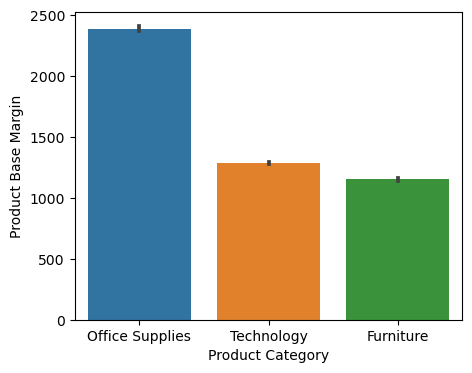

In [57]:
plt.figure(figsize=(5,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator='sum')
plt.show

In [56]:
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

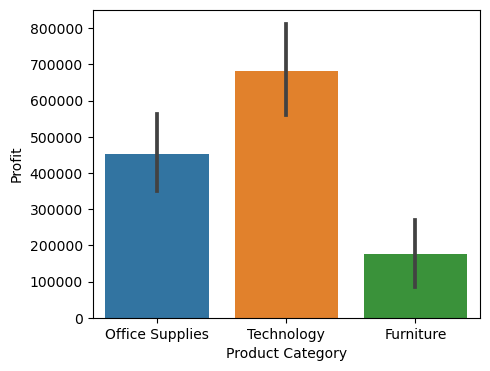

In [54]:
plt.figure(figsize=(5,4))
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator='sum')
plt.show

In [48]:
dataset['Order Year'] = dataset['Order Date'].dt.year

In [51]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

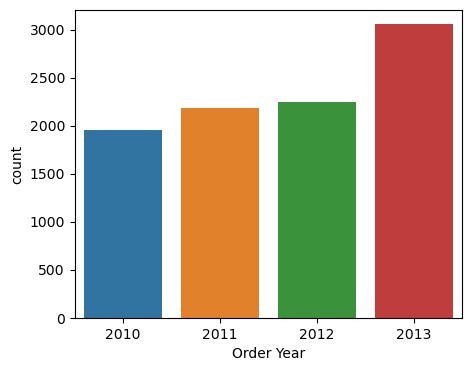

In [52]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Year",data=dataset)
plt.show()

# Product Category

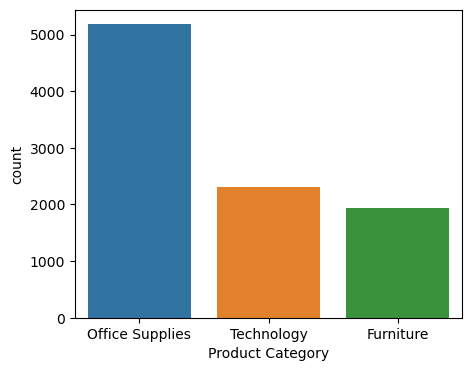

In [32]:
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category",data=dataset)
plt.show()

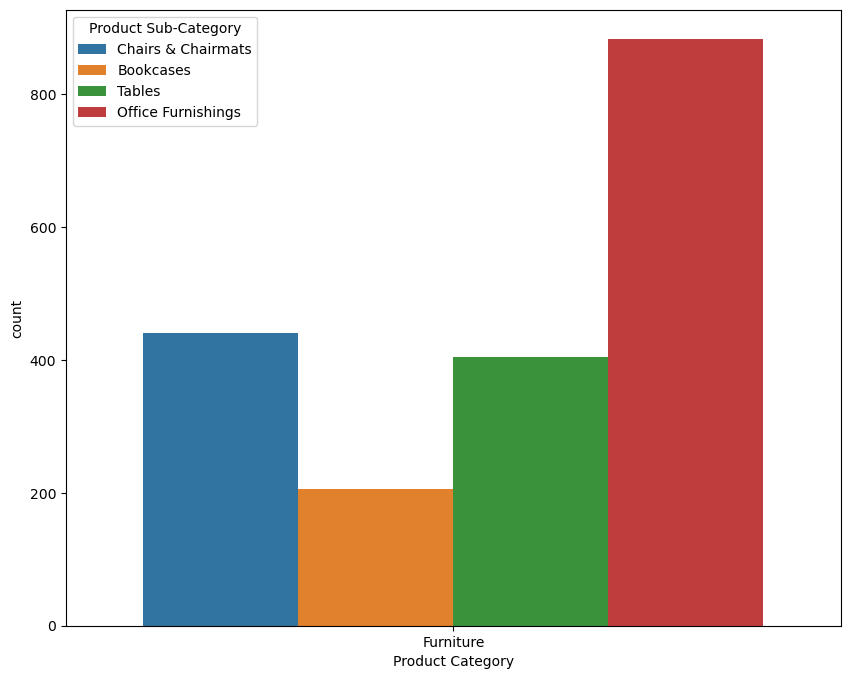

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"] =="Furniture"],hue="Product Sub-Category")
plt.show()

# Customer Segment

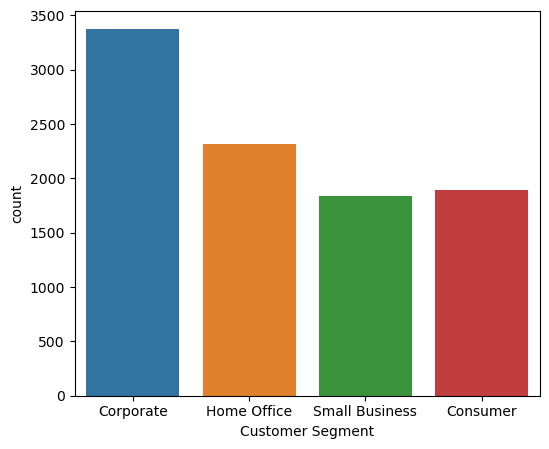

In [30]:
plt.figure(figsize=(6,5))
sns.countplot(x="Customer Segment",data=dataset)
plt.show()

# Ship Mode

In [11]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [15]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

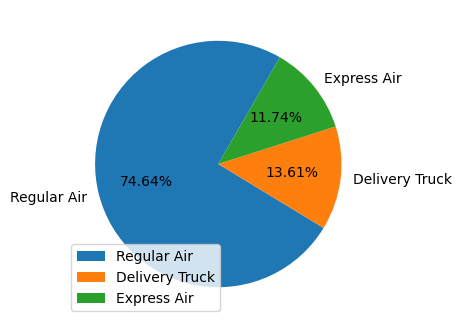

In [21]:
plt.figure(figsize=(5,4))
plt.pie(y,labels = x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=3)
plt.show()

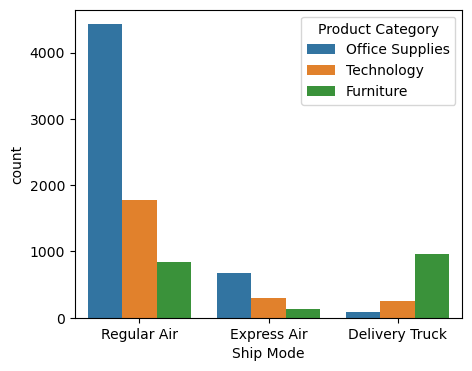

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.show()

# Order Priority

In [7]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

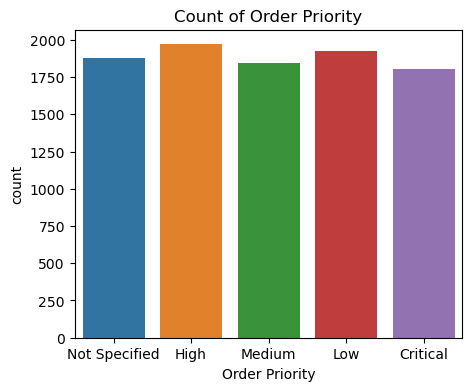

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

In [9]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [10]:
dataset['Order Priority'] = dataset["Order Priority"].replace("Critical ","Critical")